In [1]:
import numpy as np
import matplotlib.pyplot as plt

Рассмотрим самое просто построение. По оси y откладываются заданные вам значения. Ось x - индекс элементов.

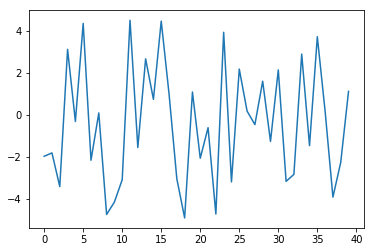

In [2]:
N = 40
x = np.random.uniform(-5, 5, N)

plt.plot(x);

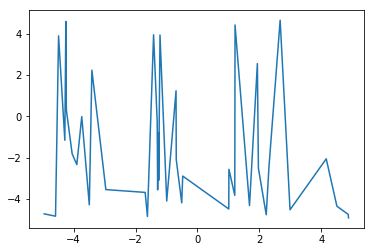

In [3]:
# чуточку усложним. Теперь значения по оси x мы задали сами.

x = np.random.uniform(-5, 5, N)
y = np.random.uniform(-5, 5, N)
x.sort()

plt.plot(x, y);

Один из самых простых примеров и распостранненых графиков: scatter plot позволяет отобразить значения двух переменных в виде точек на плоскости.

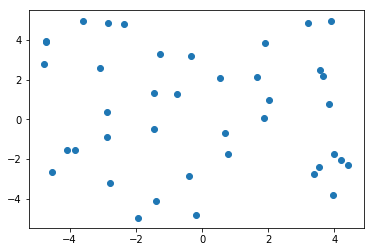

In [4]:
# сид не фиксирован, так что можете вызывать ячейку несколько раз
x = np.random.uniform(-5, 5, N)
y = np.random.uniform(-5, 5, N)

plt.scatter(x, y);

Диаграмме можно придать дополнительную информативность:
* каждая точка может иметь свой цвет, допустим, для обозначения принадлежности к определенному классу
* каждая точка может иметь свой размер, допустим, для визуализации количественной инфорации
* каждая точка может иметь свою форму, допустим, для кодирования ещё одного класса

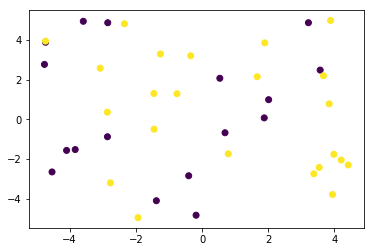

In [5]:
# Добавим цвет
c = np.random.choice([0, 1], N)
s = (25 * np.random.rand(N))**2

plt.scatter(x, y, c=c);

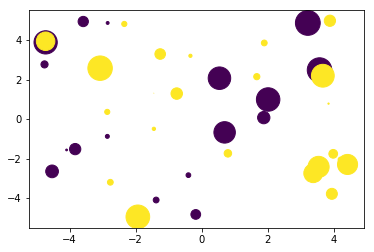

In [6]:
# добавим размер

plt.scatter(x, y, c=c, s=s);

А можно сделать вообще так:

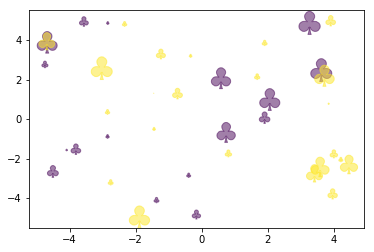

In [7]:
marker=r'$\clubsuit$'

plt.scatter(x, y, c=c, s=s, alpha=0.5, marker=r'$\clubsuit$');

Обратите внимание, что форма и прозрачность заданны константно, но их так же можно задавать как вектор.

**Всегда следите за читаюмостью: закодировать на одной картинке огромное количество информации классно (вы уже знаете минимум 5 каналов кодирования), но в какой-то момент картинка перестанет восприниматься другими людьми**

### Работа с осями

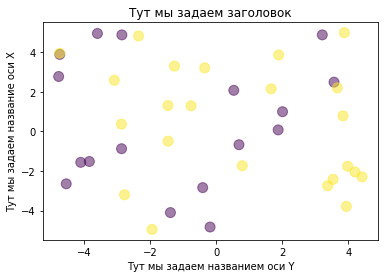

In [8]:
# Надо незабывать подписывать, что вы делаете

plt.scatter(x, y, c=c, alpha=0.5, s=100);
plt.xlabel("Тут мы задаем названием оси Y")
plt.ylabel("Тут мы задаем название оси X")
plt.title('Тут мы задаем заголовок');

Систему координат тоже можно поменять

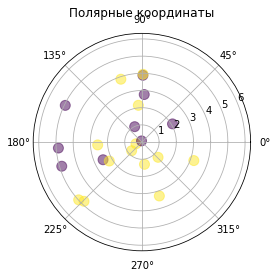

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
plt.scatter(x, y, c=c, alpha=0.5, s=100);

plt.title('Полярные координаты');

Кастомизировать можно вообще что угодно

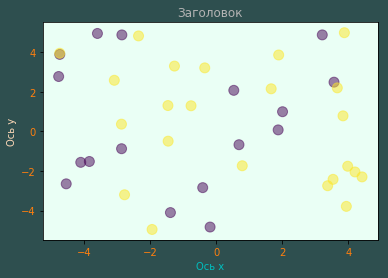

In [10]:
# 1) RGB tuple:
fig, ax = plt.subplots(facecolor=(.18, .31, .31))
# 2) hex string:
ax.set_facecolor('#eafff5')
# 3) gray level string:
ax.set_title('Заголовок', color='0.7')
# 4) single letter color string
ax.set_xlabel('Ось х', color='c')
# 5) a named color:
ax.set_ylabel('Ось y', color='peachpuff')
# 6) a named xkcd color:
ax.scatter(x, y, c=c, alpha=0.5, s=100);
# 8) tab notation:
ax.tick_params(labelcolor='tab:orange')


plt.show()

## Примеры других типов графиков

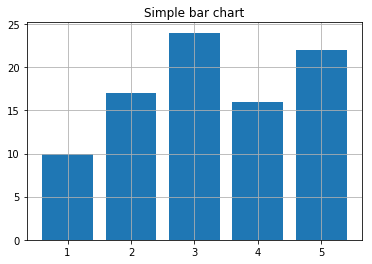

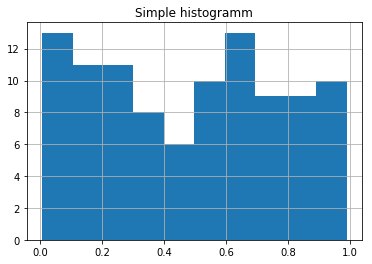

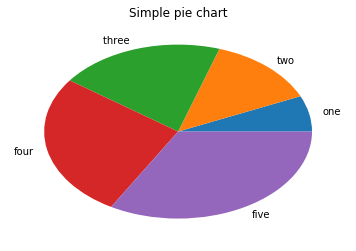

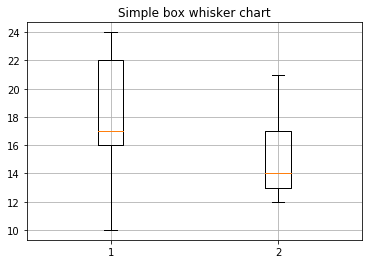

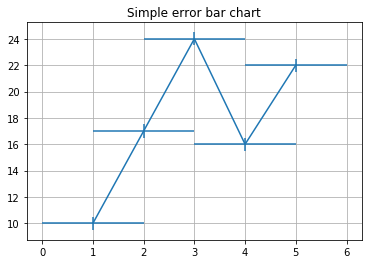

In [11]:
s = ['one','two','three ','four' ,'five']
x = [1, 2, 3, 4, 5]
z = np.random.random(100)
z1 = [10, 17, 24, 16, 22]
z2 = [12, 14, 21, 13, 17]

# bar()
fig = plt.figure()
plt.bar(x, z1)
plt.title('Simple bar chart')
plt.grid(True)   # линии вспомогательной сетки

# hist()
fig = plt.figure()
plt.hist(z)
plt.title('Simple histogramm')
plt.grid(True)

# pie()
fig = plt.figure()
plt.pie(x, labels=s)
plt.title('Simple pie chart')

# boxplot()
fig = plt.figure()
plt.boxplot([z1, z2])
plt.title('Simple box whisker chart')
plt.grid(True)

# errorbar()
fig = plt.figure()
plt.errorbar(x, z1, xerr=1, yerr=0.5)
plt.title('Simple error bar chart')
plt.grid(True)

plt.show()

### Построение нескольких графиков в сетке

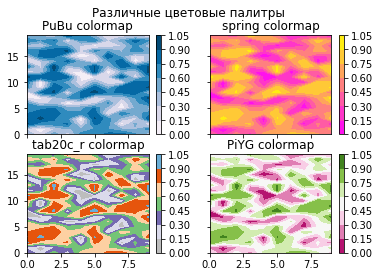

In [12]:
dat = np.random.random(200).reshape(20,10) # создаём матрицу значений

# Создаём список цветовых палитр из словаря
maps = [m for m in plt.cm.datad]
# или так
maps = []

for i, m in enumerate(plt.cm.datad):
    maps.append(m)
#    print('%d - %s' % (i, m))

# здесь мы задаем сетку для построения. Сейчас в ней 2 строки и 2 столбца.
# Для простоты в данном примере графики строятся последовательно
# Но вы можете задавать порядок (например, сначала правый нижни, потом левый нижний и т.д.)
fig, axes= plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

cmaplist = plt.cm.datad

for ax in fig.axes:
    random_cmap = np.random.choice(maps)
    cf = ax.contourf(dat, cmap=plt.get_cmap(random_cmap))
    ax.set_title('%s colormap' % random_cmap)
    fig.colorbar(cf, ax=ax)
    
plt.suptitle(u'Различные цветовые палитры')   # единый заголовок рисунка

plt.show()

**Задание: найдите способ сделать картинки больше**

### У графиков можнт быть легенда

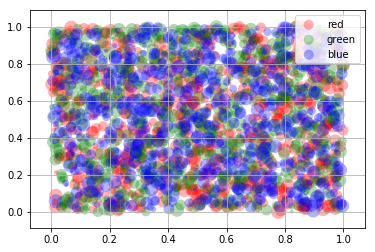

In [13]:
fig, ax = plt.subplots()
for color in ['red', 'green', 'blue']:
    n = 750
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

# Обратите внимание, что тут происходит: мы строим несколько графиков один над другим. 
# В результате этого они наклаываются и получается итоговая картинка.
# Это можно использовать для совмещения различных графиков, например наложить график плоности на график 
# В следующей ячейку они будут разделены

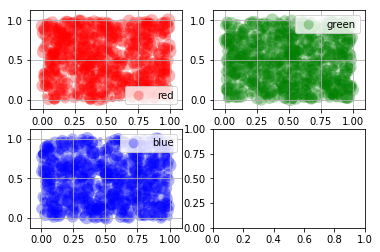

In [14]:
fig, ax = plt.subplots(ncols=2, nrows=2)
for color, ax in zip(['red', 'green', 'blue'], fig.axes):
    n = 750
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

    ax.legend()
    ax.grid(True)

plt.show()


### Задание
Что нужно сделать:
* Сгенерируйте набор данных
* Постройте для него разные типы графиков на одной картинке
* Работйте с осями, легендами

**Не стесняйтесь читать документаци/примеры/гуглить**

**Что вы должны для себя вынести:**
* Работа с одинакововыми элементами (например осями) происходит одинаково для разных типов графиков (например для bar and scatter)
* Если вам надо как-то модифицировать график, то просто загуглите эту модификацию. На stackoverflow и в документации matplotlib разобрано множество примеров